# 아핀 변환 (Affine Transformation)

**아핀 변환(Affine Transformation)**은 기하학적 대상을 한 벡터 공간에서 다른 벡터 공간으로 옮기는 변환으로, **선형 변환(Linear Transformation)**과 **평행 이동(Translation)**의 조합으로 이루어짐. 이 변환은 객체의 형태를 회전, 크기 조절, 기울이기, 이동시키는 등 다양하게 바꿀 수 있음.

아핀 변환의 중요한 특징은 **직선성(Collinearity)**과 **평행성(Parallelism)**을 보존한다는 것임. 즉, 변환 전 직선이었던 것은 변환 후에도 직선이며, 서로 평행하던 선들은 변환 후에도 평행 관계를 유지함. 컴퓨터 그래픽스, 이미지 처리, 로보틱스 등에서 객체의 위치와 형태를 제어하는 핵심적인 도구로 사용됨.

### 📐 수학적 배경 (Mathematical Background)

아핀 변환은 벡터 `v`를 선형 변환 행렬 `A`로 변환한 뒤, 평행 이동 벡터 `b`를 더하는 과정으로 표현할 수 있음.
$$ v' = A \cdot v + b $$
이 식은 행렬 곱셈과 벡터 덧셈이 분리되어 있어 여러 변환을 연속으로 적용하기에 번거로움. 이를 해결하기 위해 **동차 좌표계(Homogeneous Coordinates)**를 도입함. 동차 좌표계는 n차원 벡터에 1을 추가하여 (n+1)차원으로 확장하는 방식임.

예를 들어 2차원 벡터 $(x, y)$는 동차 좌표계에서 $(x, y, 1)$이 됨. 이를 통해 아핀 변환을 단일 행렬 곱으로 표현할 수 있음.
$$ \begin{pmatrix} x' \ y' \ 1 \end{pmatrix} = \begin{pmatrix} a & b & t_x \ c & d & t_y \ 0 & 0 & 1 \end{pmatrix} \begin{pmatrix} x \ y \ 1 \end{pmatrix} $$

여기서 왼쪽의 2x2 부분 행렬 `[[a, b], [c, d]]`는 선형 변환(회전, 크기 조절, 기울이기)을, 마지막 열의 `[t_x, t_y]`는 평행 이동을 담당함.

In [1]:
# 라이브러리 임포트 (Setup)
# !pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
변환을 시각적으로 확인하기 위해 간단한 삼각형을 정의함. 각 꼭짓점은 동차 좌표계 (x, y, 1)로 표현함.

In [2]:
# 원본 삼각형 정의 (각 열이 하나의 꼭짓점)
triangle = np.array([
    [0, 2, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 1]  # 동차 좌표계를 위한 1 추가
])

print("원본 삼각형의 꼭짓점 (동차 좌표계):")
print(triangle)

원본 삼각형의 꼭짓점 (동차 좌표계):
[[0 2 0 0]
 [0 0 1 0]
 [1 1 1 1]]


### 핵심 로직 구현 (Code Implementation)
다양한 아핀 변환(이동, 크기 조절, 회전, 기울이기)을 수행하는 행렬을 정의하고, 이들을 원본 삼각형에 적용함.

In [3]:
# 1. 평행 이동 (Translation) 변환 행렬
tx, ty = 3, 1
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])

# 2. 크기 조절 (Scaling) 변환 행렬
sx, sy = 1.5, 0.8
scaling_matrix = np.array([
    [sx, 0, 0],
    [0, sy, 0],
    [0, 0, 1]
])

# 3. 회전 (Rotation) 변환 행렬 (45도)
theta = np.deg2rad(45)
c, s = np.cos(theta), np.sin(theta)
rotation_matrix = np.array([
    [c, -s, 0],
    [s,  c, 0],
    [0,  0, 1]
])

# 4. 기울이기 (Shearing) 변환 행렬
shx = 0.5
shearing_matrix = np.array([
    [1, shx, 0],
    [0, 1, 0],
    [0, 0, 1]
])

# 각 변환 행렬을 원본 삼각형에 적용
translated_triangle = translation_matrix @ triangle
scaled_triangle = scaling_matrix @ triangle
rotated_triangle = rotation_matrix @ triangle
sheared_triangle = shearing_matrix @ triangle

print("이동 변환 후 꼭짓점:")
print(translated_triangle)

# 복합 변환: 크기 조절 후 회전하고 이동
composite_matrix = translation_matrix @ rotation_matrix @ scaling_matrix
composite_triangle = composite_matrix @ triangle

print("\n복합 변환 행렬:")
print(composite_matrix)

print("\n복합 변환 후 꼭짓점:")
print(composite_triangle)

이동 변환 후 꼭짓점:
[[3 5 3 3]
 [1 1 2 1]
 [1 1 1 1]]

복합 변환 행렬:
[[ 1.06066017 -0.56568542  3.        ]
 [ 1.06066017  0.56568542  1.        ]
 [ 0.          0.          1.        ]]

복합 변환 후 꼭짓점:
[[3.         5.12132034 2.43431458 3.        ]
 [1.         3.12132034 1.56568542 1.        ]
 [1.         1.         1.         1.        ]]


### 📊 결과 확인 및 시각화 (Results & Visualization)
원본 삼각형과 각 아핀 변환이 적용된 삼각형들을 그래프에 그려 비교함.

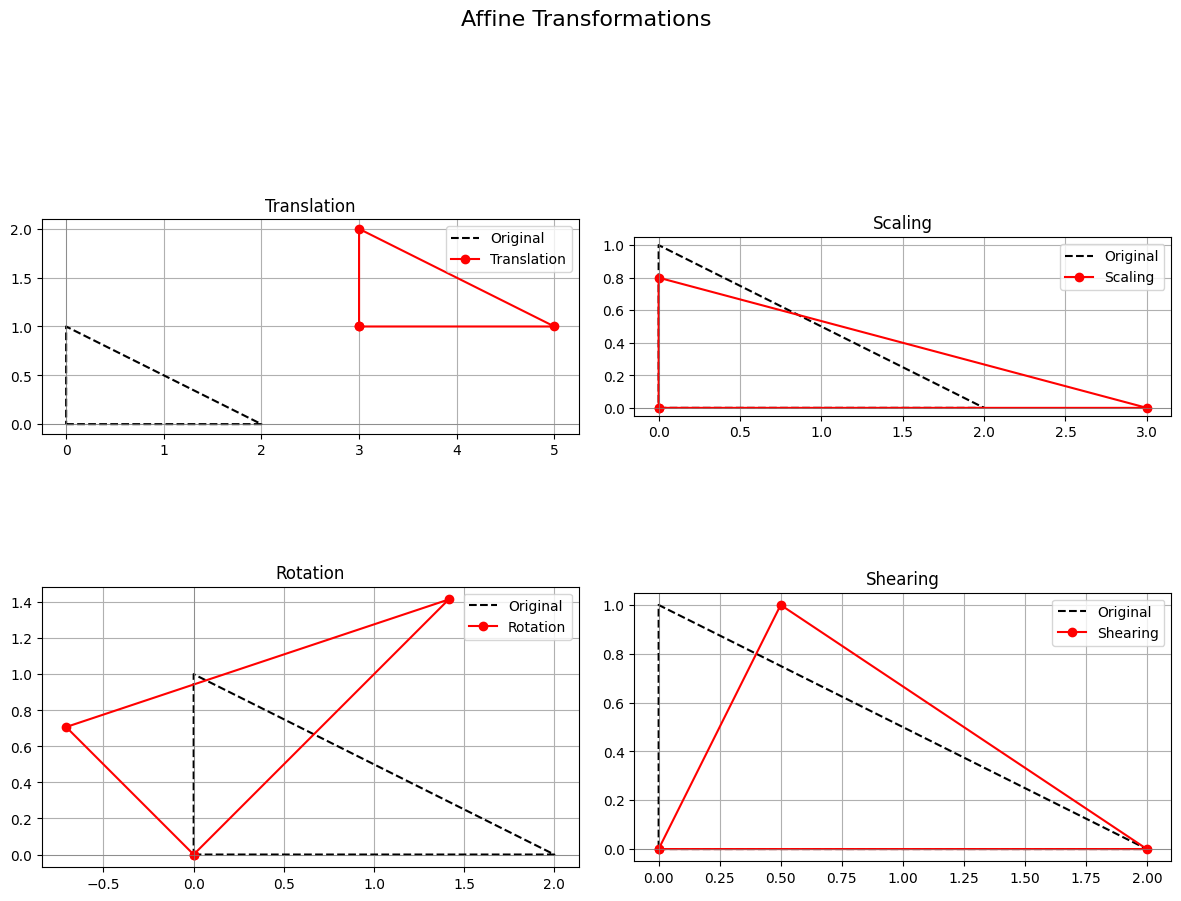

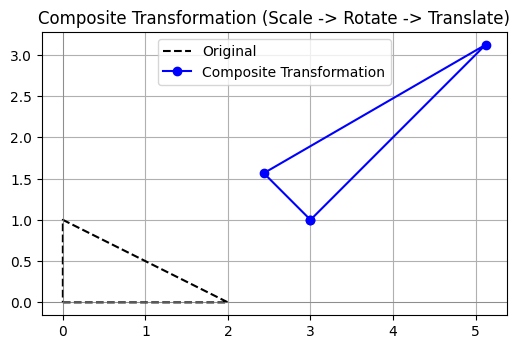

In [4]:
def plot_triangle(matrix, label, style='-o'):
    plt.plot(matrix[0, :], matrix[1, :], style, label=label)

plt.figure(figsize=(12, 10))
plt.suptitle('Affine Transformations', fontsize=16)

# 개별 변환 시각화
titles = ['Translation', 'Scaling', 'Rotation', 'Shearing']
transformed_triangles = [translated_triangle, scaled_triangle, rotated_triangle, sheared_triangle]

for i, (title, transformed) in enumerate(zip(titles, transformed_triangles)):
    plt.subplot(2, 2, i + 1)
    plot_triangle(triangle, 'Original', 'k--')
    plot_triangle(transformed, title, 'r-o')
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.legend()
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 복합 변환 시각화
plt.figure(figsize=(6, 6))
plot_triangle(triangle, 'Original', 'k--')
plot_triangle(composite_triangle, 'Composite Transformation', 'b-o')
plt.title('Composite Transformation (Scale -> Rotate -> Translate)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.show()

### 고려사항 (Considerations)

* **변환 순서의 중요성:** 행렬 곱셈은 교환법칙이 성립하지 않으므로, 변환을 적용하는 순서에 따라 결과가 달라짐. 예를 들어, '회전 후 이동'과 '이동 후 회전'의 결과는 전혀 다름.
* **3D 확장:** 2D에서의 개념은 3D로 쉽게 확장될 수 있음. 3차원 벡터 `(x, y, z)`를 동차 좌표 `(x, y, z, 1)`로 표현하고, 4x4 크기의 변환 행렬을 사용하여 동일한 원리로 변환을 적용함.

### 최종 요약 (Conclusion)

아핀 변환은 선형 변환과 평행 이동을 결합하여 객체를 자유롭게 조작하는 강력한 도구임. 동차 좌표계를 사용하면 회전, 크기 조절, 이동 등 복잡한 변환들을 단일 행렬의 곱으로 간결하게 표현하고 계산할 수 있음.

시각화 예제를 통해 각 변환이 기하학적 객체에 어떤 영향을 미치는지 직관적으로 확인할 수 있었음. 이처럼 아핀 변환은 컴퓨터 그래픽스에서 2D 및 3D 객체를 원하는 위치와 형태로 배치하고 애니메이션을 만드는 데 필수적인 기반 기술임.